In [2]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

os.chdir(r"C:\Users\tdrown\Documents\Blogs\Commercial Real Estate Blog")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cnt_file = r'Costar Data\Central.xlsx'
gl_file = r'Costar Data\Great Lakes.xlsx'
ma_file = r'Costar Data\Mid-Atlantic.xlsx'
ne_file = r'Costar Data\Northeast.xlsx'
se_file = r'Costar Data\Southeast.xlsx'
sw_file = r'Costar Data\Southwest.xlsx'
we_file = r'Costar Data\West.xlsx'
cl_a_file = r'Costar Data\Class A.xlsx'
cl_b_file = r'Costar Data\Class B.xlsx'
cl_c_file = r'Costar Data\Class C.xlsx'

#Costar scenario files
master_file = r'Costar Data\Master.xlsx'


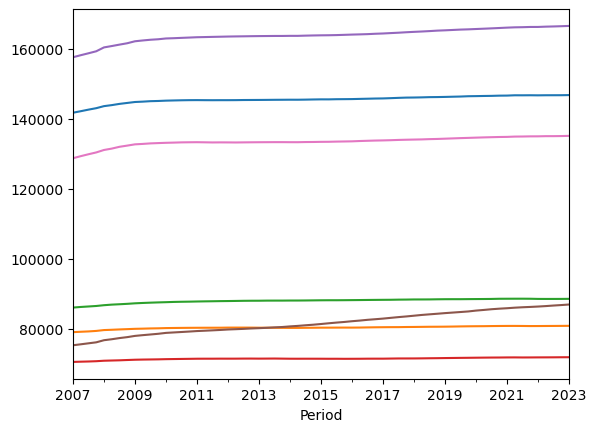

In [5]:
cnt = pd.read_excel(cnt_file)
gl = pd.read_excel(gl_file)
ma = pd.read_excel(ma_file)
ne = pd.read_excel(ne_file)
se = pd.read_excel(se_file)
sw = pd.read_excel(sw_file)
we = pd.read_excel(we_file)
cl_a = pd.read_excel(cl_a_file)
cl_b = pd.read_excel(cl_b_file)
cl_c = pd.read_excel(cl_c_file)


def clean(df):
    df.rename(columns={'  Period': 'Period'}, inplace=True)
    df = df[['Period', 'Inventory Bldgs', 'Inventory SF', 'Net Absorption SF Total']].copy()
    df = df.loc[df['Period'] != '2023 Q2 QTD']
    df.Period = df.Period.str.replace(" ", "-")
    df.Period = pd.PeriodIndex(df.Period, freq='Q').to_timestamp()
    df = df.loc[df['Period'] > '2006-12-01'].copy()
    df.sort_values('Period', inplace=True)
    df.set_index('Period', inplace=True)
    return df

cnt = clean(cnt)
gl = clean(gl)
ma = clean(ma)
ne = clean(ne)
se = clean(se)
sw = clean(sw)
we = clean(we)
cl_a = clean(cl_a)
cl_b = clean(cl_b)
cl_c = clean(cl_c)

for col in se.columns:
    se[col] = pd.to_numeric(se[col])
    
reg_list = [cnt, gl, ma, ne, se, sw, we]
class_list = [cl_a, cl_b, cl_c]
cnt['Inventory Bldgs'].plot()
gl['Inventory Bldgs'].plot()
ma['Inventory Bldgs'].plot()
ne['Inventory Bldgs'].plot()
se['Inventory Bldgs'].plot()
sw['Inventory Bldgs'].plot()
we['Inventory Bldgs'].plot()
plt.show()

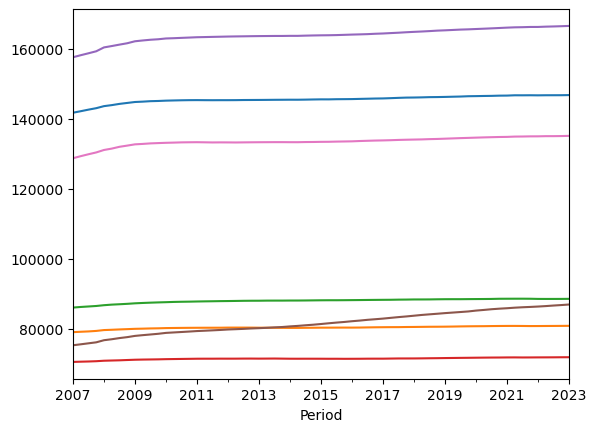



Central

ADF Test:
ADF Statistic:-0.6772992318262135
p-value:0.8525422569089118
No. of Lags Used:2
Number of Obs:62
Fail to reject H0 thereby data is non-stationary


Great Lakes

ADF Test:
ADF Statistic:-1.9064346300674095
p-value:0.3290401389056926
No. of Lags Used:2
Number of Obs:62
Fail to reject H0 thereby data is non-stationary


Mid-Atlantic

ADF Test:
ADF Statistic:-10.543582644982294
p-value:8.525759406259645e-19
No. of Lags Used:0
Number of Obs:64
Reject null hypothesis and data is stationary


Northeast

ADF Test:
ADF Statistic:0.8238198820922084
p-value:0.9920110965943729
No. of Lags Used:0
Number of Obs:64
Fail to reject H0 thereby data is non-stationary


Southeast

ADF Test:
ADF Statistic:0.9902855816790753
p-value:0.9941623852950063
No. of Lags Used:4
Number of Obs:60
Fail to reject H0 thereby data is non-stationary


Southwest

ADF Test:
ADF Statistic:0.27038678882695605
p-value:0.9759443035380546
No. of Lags Used:9
Number of Obs:55
Fail to reject H0 thereby data is 

In [6]:
#Seasonality Trend - Quarter
from statsmodels.tsa.seasonal import seasonal_decompose
#Exploratory

cnt['Inventory Bldgs'].loc[cnt.index > '2005-12-01'].plot()
gl['Inventory Bldgs'].loc[gl.index > '2005-12-01'].plot()
ma['Inventory Bldgs'].loc[ma.index > '2005-12-01'].plot()
ne['Inventory Bldgs'].loc[ne.index > '2005-12-01'].plot()
se['Inventory Bldgs'].loc[se.index > '2005-12-01'].plot()
sw['Inventory Bldgs'].loc[sw.index > '2005-12-01'].plot()
we['Inventory Bldgs'].loc[we.index > '2005-12-01'].plot()
plt.show()

from ipynb.fs.full.Functions import check_adf
print_list = ['Central', 'Great Lakes', 'Mid-Atlantic', 'Northeast', 'Southeast', 'Southwest', 'West']
i=0
for df in reg_list:
    print('')
    print('')
    print(print_list[i])
    print('')
    check_adf(df['Inventory SF'].dropna())
    i = i+1

diff1 = pd.DataFrame(cnt['Inventory SF'].copy())
diff1['Inventory SF'] = diff1['Inventory SF'] - diff1['Inventory SF'].shift(1)
diff1 = check_adf(diff1.dropna())


Central
Grid Search
(4, 1, 1)

Step Model
(4, 1, 1)


Great Lakes
Grid Search
(5, 2, 0)

Step Model
(0, 2, 0)


Mid_Atlantic
Grid Search
(0, 2, 0)

Step Model
(0, 2, 0)


Northeast
Grid Search
(0, 1, 0)

Step Model
(0, 1, 0)


Southeast
Grid Search
(0, 2, 8)

Step Model
(0, 2, 0)


Southwest
Grid Search
(9, 1, 7)

Step Model
(0, 1, 0)


West
Grid Search
(7, 1, 6)

Step Model
(1, 1, 1)



Class A

ADF Test:
ADF Statistic:0.5337946807093705
p-value:0.9858648589044844
No. of Lags Used:11
Number of Obs:53
Fail to reject H0 thereby data is non-stationary


Class B

ADF Test:
ADF Statistic:-1.1662129677446649
p-value:0.6879586217864327
No. of Lags Used:3
Number of Obs:61
Fail to reject H0 thereby data is non-stationary


Class C

ADF Test:
ADF Statistic:-1.0321691888657512
p-value:0.741351294926905
No. of Lags Used:5
Number of Obs:59
Fail to reject H0 thereby data is non-stationary


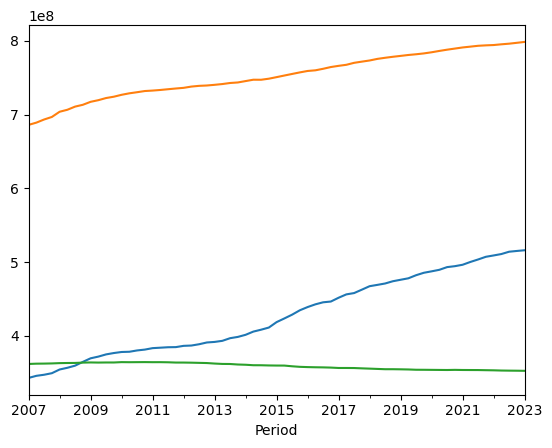


Class A
Grid Search
(8, 1, 5)

Step Model
(0, 1, 0)


Class B
Grid Search
(3, 2, 1)

Step Model
(1, 2, 3)


Class C
Grid Search
(0, 2, 0)

Step Model
(0, 2, 0)



In [7]:
import pmdarima as pm

train = cnt['Inventory SF'].loc[cnt.index < '2019-01-01'].copy()
test = cnt['Inventory SF'].loc[cnt.index >= '2019-01-01'].copy()

#########################################################################################################################
def model_search(df):
    gs_model = pm.auto_arima(df, max_p=11, max_q=11, max_d=3,
                                max_D=3, max_P=1, max_Q=1,
                                seasonal = True,
                                information_criterion='aic', trace=False,
                                error_action='ignore', max_order=None, stepwise=False)
    # stepwise search
    step_model = pm.auto_arima(df, information_criterion='aic',
                               trace=False, seasonal=True,
                               error_action='ignore', max_order=None)
    
    print("Grid Search")
    print(gs_model.get_params().get("order")[0:])
    print('')
    print("Step Model")
    print(step_model.get_params().get("order")[0:])
    #return gs_model, step_model

print_list=['Central', 'Great Lakes', 'Mid_Atlantic', 'Northeast', 'Southeast', 'Southwest', 'West']
i = 0
for df in reg_list:
    print("")
    print(print_list[i])
    model_search(df['Inventory SF'])
    print("")
    i=i+1
    
from ipynb.fs.full.Functions import check_adf
print_list = ['Class A', 'Class B', 'Class C']
i=0
for df in class_list:
    print('')
    print('')
    print(print_list[i])
    print('')
    check_adf(df['Inventory SF'].dropna())
    i = i+1
    
cl_a['Inventory SF'].plot()
cl_b['Inventory SF'].plot()
cl_c['Inventory SF'].plot()
plt.show()

i = 0
for df in class_list:
    print("")
    print(print_list[i])
    model_search(df['Inventory SF'])
    print("")
    i=i+1


In [8]:
def model_forecast(df, region):
    #Modeling with 224
    from statsmodels.tsa.arima.model import ARIMA
    train = df['Inventory Bldgs'].loc[df.index < '2019-01-01'].copy()
    test = df['Inventory Bldgs'].loc[df.index >= '2019-01-01'].copy()
    
    if region=='Central':
        model = ARIMA(train, order=(2,2,4)).fit()
    if region=='Great Lakes':
        model = ARIMA(train, order=(0,2,1)).fit()
    if region=='Mid-Atlantic':
        model = ARIMA(train, order=(2,2,2)).fit()
    if region=='Northeast':
        model = ARIMA(train, order=(4,2,0)).fit()
    if region=='Southeast':
        model = ARIMA(train, order=(0,2,0)).fit()
    if region=='Southwest':
        model = ARIMA(train, order=(2,1,2)).fit()
    if region=='West':
        model = ARIMA(train, order=(1,2,2)).fit()        
    if region=='Class A':
        model = ARIMA(train, order=(4,1,0)).fit()
    if region=='Class B':
        model = ARIMA(train, order=(2,1,2)).fit()
    if region=='Class C':
        model = ARIMA(train, order=(8,0,4)).fit()
            
    
    df['forecast'] = model.predict(start=test.index[0], end=test.index[-1], dynamic=True)
    x = df.copy()
    x['Train'] = np.where(x.index < '2019-01-01', x['Inventory Bldgs'], np.nan)
    x['Test'] = np.where(x.index >= '2019-01-01', x['Inventory Bldgs'], np.nan)
    x[['Train', 'Test', 'forecast']].plot(figsize=(12,8))
    print(model.summary())
    
    y_pred = model.get_forecast(8)
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df['prediction'] = model.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

    preds_df = (model.get_prediction(start='2023-01-01', end='2024-12-01').summary_frame())
    print(preds_df.head())
    y_pred_df.prediction

    #+preds_df['mean'] = np.where(preds_df.index=='2023-01-01', df['Inventory Bldgs'].loc[df.index =='2023-01-01'], preds_df['mean'])
    #preds_df['mean_ci_lower'] = np.where(preds_df.index=='2023-01-01', df['Inventory Bldgs'].loc[df.index =='2023-01-01'], preds_df['mean_ci_lower'])
    #preds_df['mean_ci_upper'] = np.where(preds_df.index=='2023-01-01', df['Inventory Bldgs'].loc[df.index =='2023-01-01'], preds_df['mean_ci_upper'])
    
    #Plot
    fig, ax = plt.subplots(figsize=(10,5))
    ax = df['Inventory Bldgs'][df.index >= '2010-01-01'].plot(style='#595959', label='Historic Data')

    preds_df['mean'].plot(ax=ax, style='#ED7D31', label='Predicted Mean')
    ax.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'],
                    color='#ED7D31', alpha=0.05)
    legend = ax.legend(loc='upper left')
    plt.xticks(rotation=45)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis=u'both', which=u'both', length=0)
    ax.set(title=region + '\n'+'Historic and Predicted values, with Confidence Intervals',
           xlabel='Date',
           ylabel='Actual and Predicted Values')
    plt.savefig("C:/Users/tdrown/Documents/Commercial Real Estate Blog/Plots/"+region+'.png') 
    plt.show()
    return preds_df

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        Inventory Bldgs   No. Observations:                   48
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -237.073
Date:                Mon, 08 May 2023   AIC                            488.147
Time:                        14:26:28   BIC                            500.947
Sample:                    01-01-2007   HQIC                           492.942
                         - 10-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5178      0.142     -3.653      0.000      -0.796      -0.240
ar.L2         -0.0837      0.116     -0.725      0.469      -0.310       0.143
ma.L1          0.3673     77.518      0.005      0.9

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/tdrown/Documents/Commercial Real Estate Blog/Plots/Central.png'

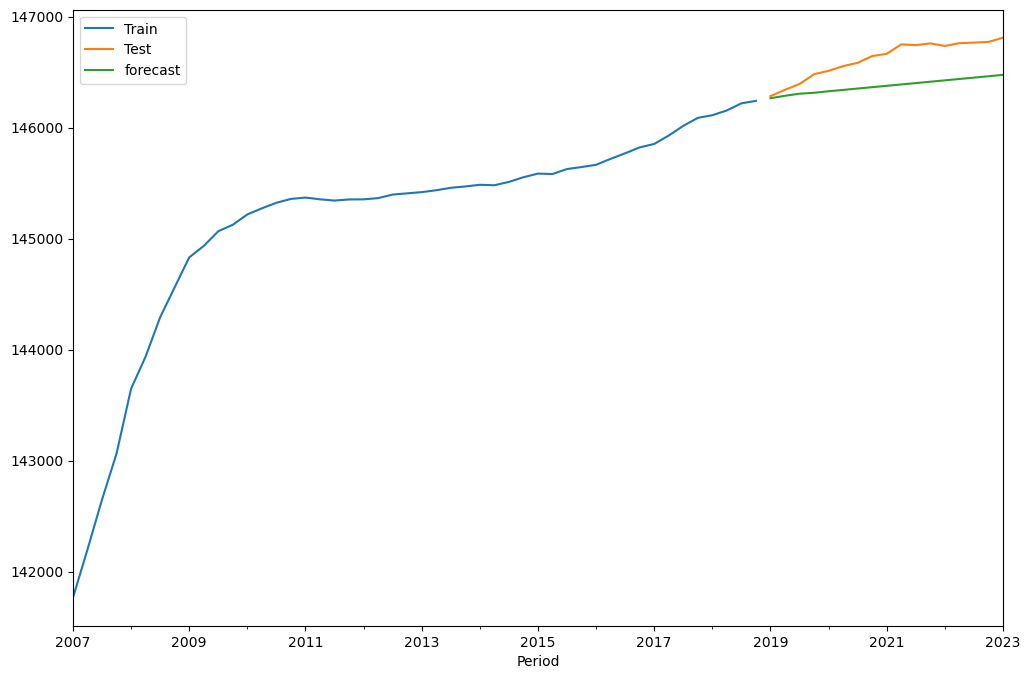

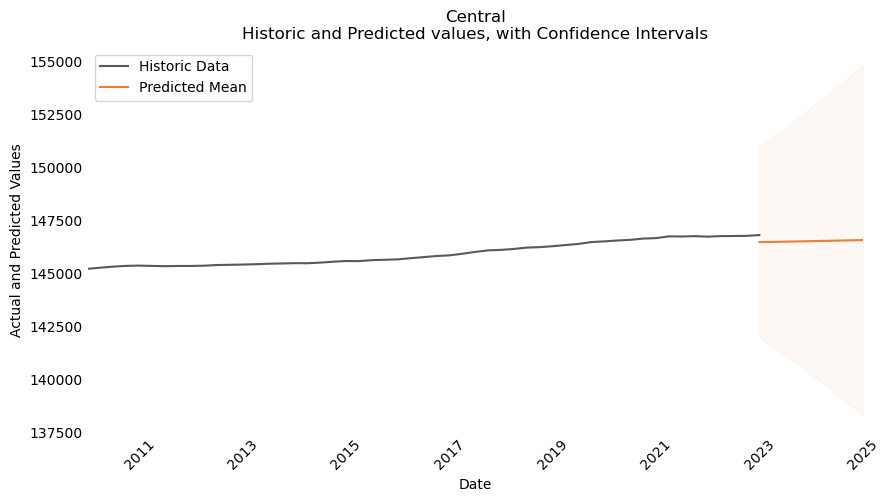

In [10]:
#model_forecast(cnt, "Central")
cnt_out = pd.DataFrame()
gl_out = pd.DataFrame()
ma_out = pd.DataFrame()
ne_out = pd.DataFrame()
se_out = pd.DataFrame()
sw_out = pd.DataFrame()
we_out = pd.DataFrame()
cl_a_out = pd.DataFrame()
cl_b_out = pd.DataFrame()
cl_c_out = pd.DataFrame()


cnt_out = model_forecast(cnt, "Central")
gl_out = model_forecast(gl, "Great Lakes")
ma_out = model_forecast(ma, "Mid-Atlantic")
ne_out = model_forecast(ne, "Northeast")
se_out = model_forecast(se, "Southeast")
sw_out = model_forecast(sw, "Southwest")
we_out = model_forecast(we, "West")
cl_a_out = model_forecast(cl_a, "Class A")
cl_b_out = model_forecast(cl_b, "Class B")
cl_c_out = model_forecast(cl_c, "Class C")

print_list = ['Central', 'Great Lakes', 'Mid-Atlantic', 'Northeast', 'Southeast', 'Southwest', 'West', 'Class A', 'Class B', 'Class C']
writer = pd.ExcelWriter('C:/Users/tdrown/Documents/Blogs/Commercial Real Estate Blog/Output/Forecast.xlsx', engine='xlsxwriter')
i=0
print(print_list[i])
cnt_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
gl_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
ma_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
ne_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
se_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
sw_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
we_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
cl_a_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
cl_b_out.to_excel(writer, sheet_name=print_list[i])
i=i+1
print(print_list[i])
cl_c_out.to_excel(writer, sheet_name=print_list[i])

writer.close()

C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\tdrown\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Inventory SF   No. Observations:                   65
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1009.011
Date:                Mon, 08 May 2023   AIC                           2020.022
Time:                        14:26:29   BIC                           2022.165
Sample:                    01-01-2007   HQIC                          2020.865
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.625e+12   4.63e+11      9.989      0.000    3.72e+12    5.53e+12
Ljung-Box (L1) (Q):                  14.88   Jarque-Bera (JB):                41.29
Prob(Q):                              0.00   Pr

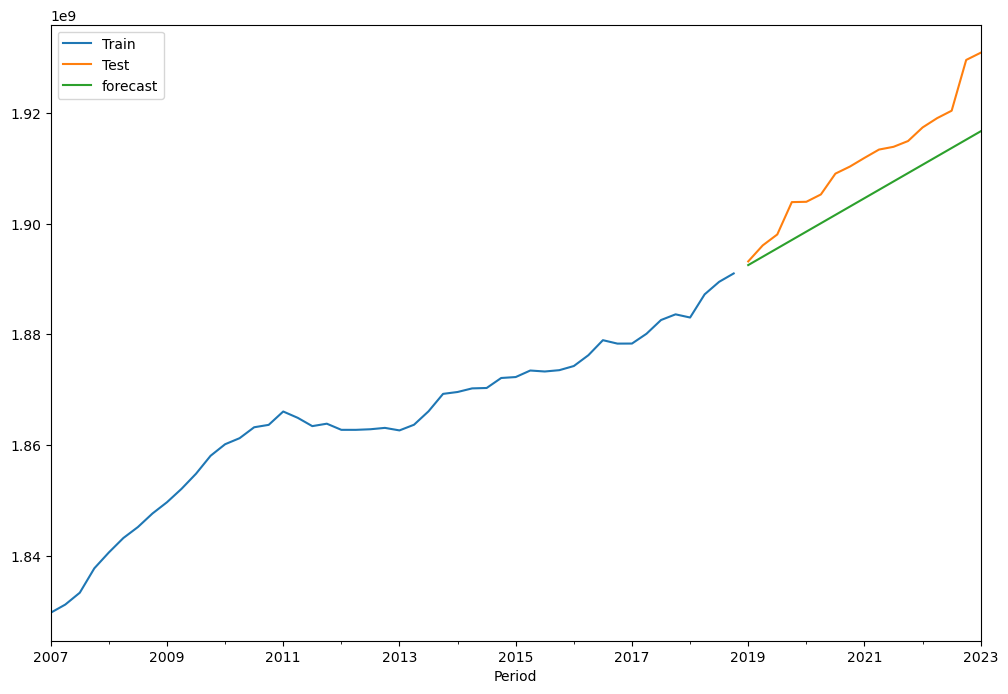

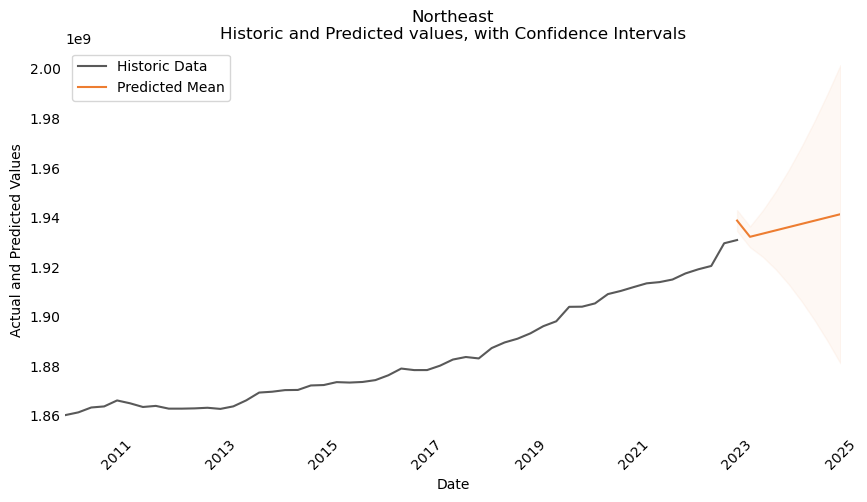

In [11]:
df = ne.copy()
order = (0,2,0)
region="Northeast"

from statsmodels.tsa.arima.model import ARIMA
train = df['Inventory SF'].loc[df.index < '2019-01-01'].copy()
test = df['Inventory SF'].loc[df.index >= '2019-01-01'].copy()

model = ARIMA(df['Inventory SF'], order=order).fit()


df['forecast'] = model.predict(start=test.index[0], end=test.index[-1], dynamic=True)
x = df.copy()
x['Train'] = np.where(x.index < '2019-01-01', x['Inventory SF'], np.nan)
x['Test'] = np.where(x.index >= '2019-01-01', x['Inventory SF'], np.nan)
x[['Train', 'Test', 'forecast']].plot(figsize=(12,8))
print(model.summary())

y_pred = model.get_forecast(8)
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['prediction'] = model.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

preds_df = (model.get_prediction(start='2023-01-01', end='2024-12-01').summary_frame())
print(preds_df.head())
y_pred_df.prediction

#+preds_df['mean'] = np.where(preds_df.index=='2023-01-01', df['Inventory Bldgs'].loc[df.index =='2023-01-01'], preds_df['mean'])
#preds_df['mean_ci_lower'] = np.where(preds_df.index=='2023-01-01', df['Inventory Bldgs'].loc[df.index =='2023-01-01'], preds_df['mean_ci_lower'])
#preds_df['mean_ci_upper'] = np.where(preds_df.index=='2023-01-01', df['Inventory Bldgs'].loc[df.index =='2023-01-01'], preds_df['mean_ci_upper'])

#Plot
fig, ax = plt.subplots(figsize=(10,5))
ax = df['Inventory SF'][df.index >= '2010-01-01'].plot(style='#595959', label='Historic Data')

preds_df['mean'].plot(ax=ax, style='#ED7D31', label='Predicted Mean')
ax.fill_between(preds_df.index, preds_df['mean_ci_lower'], preds_df['mean_ci_upper'],
                color='#ED7D31', alpha=0.05)
legend = ax.legend(loc='upper left')
plt.xticks(rotation=45)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both', length=0)
ax.set(title=region + '\n'+'Historic and Predicted values, with Confidence Intervals',
       xlabel='Date',
       ylabel='Actual and Predicted Values')

plt.show()


In [30]:
#Scenarios from Costar
base = pd.read_excel(master_file, sheet_name='Base Case', usecols='C,F,G,H')
base['Time'] = pd.to_datetime(base.Time)
base.set_index(base.Time, inplace=True)

shock = pd.read_excel(master_file, sheet_name='Interest Rate Shock', usecols='C,F,G,H')
shock['Time'] = pd.to_datetime(shock.Time)
shock.set_index(shock.Time, inplace=True)

moderate = pd.read_excel(master_file, sheet_name='Moderate', usecols='C,F,G,H')
moderate['Time'] = pd.to_datetime(moderate.Time)
moderate.set_index(moderate.Time, inplace=True)

severe = pd.read_excel(master_file, sheet_name='Severe', usecols='C,F,G,H')
severe['Time'] = pd.to_datetime(severe.Time)
severe.set_index(severe.Time, inplace=True)

west_i = base[['Region', 'Inventory SF']].loc[base.Region=='West'].copy()
west_na = base[['Region', 'Net Absorption']].loc[base]

Time        Region  Inventory SF  Net Absorption SF
0     2013-01-01     Southwest       3970058            79466.0
1     2013-04-01     Southwest       3971858              271.0
2     2013-07-01     Southwest       3971858            -4164.0
3     2013-10-01     Southwest       3974157            13030.0
4     2014-01-01     Southwest       3974516             2904.0
5     2014-04-01     Southwest       3974516            -1063.0
6     2014-07-01     Southwest       3976541             3615.0
7     2014-10-01     Southwest       3978795            -5321.0
8     2015-01-01     Southwest       3982019           -56887.0
9     2015-04-01     Southwest       3982019            13445.0
10    2015-07-01     Southwest       3982019            -3179.0
11    2015-10-01     Southwest       3982019           -29239.0
12    2016-01-01     Southwest       3982019            -2158.0
13    2016-04-01     Southwest       3982019             6603.0
14    2016-07-01     Southwest       3982019           -22910.0
15    2016-10-01     Southwest       3982019           -18363.0
16    2017-01-01     Southwest       3992676           -32669.0
17    2017-04-01     Southwest       3992676           -25765.0
18    2017-07-01     Southwest       3992676            66712.0
19    2017-10-01     Southwest       3992676            18777.0
20    2018-01-01     Southwest       3992676           -21393.0
21    2018-04-01     Southwest       3995843            20534.0
22    2018-07-01     Southwest       3995843           -78264.0
23    2018-10-01     Southwest       3995843            17676.0
24    2019-01-01     Southwest       3995843           -28541.0
25    2019-04-01     Southwest       4000063            17616.0
26    2019-07-01     Southwest       4000063           -19370.0
27    2019-10-01     Southwest       4000063           -23914.0
28    2020-01-01     Southwest       4000063           -23887.0
29    2020-04-01     Southwest       4000063            17286.0
30    2020-07-01     Southwest       4000063            65230.0
31    2020-10-01     Southwest       4000063             1407.0
32    2021-01-01     Southwest       4000063            18697.0
33    2021-04-01     Southwest       4000063           -14027.0
34    2021-07-01     Southwest       4003063           -15893.0
35    2021-10-01     Southwest       4003063           102866.0
36    2022-01-01     Southwest       4003063           -28224.0
37    2022-04-01     Southwest       4003063           -44497.0
38    2022-07-01     Southwest       4003063             5413.0
39    2022-10-01     Southwest       4003063            36613.0
40    2023-01-01     Southwest       4003063           -32198.0
41    2023-04-01     Southwest       4003063           -22570.0
42    2023-07-01     Southwest       4002485           -15436.0
43    2023-10-01     Southwest       4001830           -17694.0
44    2024-01-01     Southwest       4001175            -9389.0
45    2024-04-01     Southwest       4000539            -5135.0
46    2024-07-01     Southwest       3999944            -3828.0
47    2024-10-01     Southwest       3999371            -2713.0
48    2025-01-01     Southwest       3998835            -1821.0
49    2025-04-01     Southwest       3998307            -1165.0
50    2025-07-01     Southwest       3997805            -1064.0
51    2025-10-01     Southwest       3997319             -653.0
52    2026-01-01     Southwest       3996848            -1747.0
53    2026-04-01     Southwest       3996389            -1969.0
54    2026-07-01     Southwest       3995944            -2053.0
55    2026-10-01     Southwest       3995521            -2351.0
56    2027-01-01     Southwest       3995096            -2439.0
57    2027-04-01     Southwest       3994681            -2597.0
58    2027-07-01     Southwest       3994264            -2635.0
59    2027-10-01     Southwest       3993855            -2625.0
60    2028-01-01     Southwest       3993463            -2591.0
61    2013-01-01   Great Lakes      33816412